In [1]:
import feather
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF

In [2]:
train = feather.read_dataframe('../data/interim/train.ftr')
test = feather.read_dataframe('../data/interim/test.ftr')

train['totals.transactionRevenue'] = train['totals.transactionRevenue'].astype(float)
train['totals.transactionRevenue_log'] = train['totals.transactionRevenue'].apply(lambda x: np.log(x) if x==x else 0)
train['date'] = pd.to_datetime(train['date'], format='%Y%m%d')
test['date'] = pd.to_datetime(test['date'], format='%Y%m%d')

train.shape, test.shape

((903653, 56), (804684, 53))

In [3]:
drop_columns = [
     'device.browserSize',
     'device.browserVersion',
     'device.flashVersion',
     'device.language',
     'device.mobileDeviceBranding',
     'device.mobileDeviceInfo',
     'device.mobileDeviceMarketingName',
     'device.mobileDeviceModel',
     'device.mobileInputSelector',
     'device.operatingSystemVersion',
     'device.screenColors',
     'device.screenResolution',
     ]

In [4]:
train = train.drop(drop_columns, axis=1)
test = test.drop(drop_columns, axis=1)
device_columns = [col for col in train.columns if 'device' in col]
device_columns

['device.browser',
 'device.deviceCategory',
 'device.isMobile',
 'device.operatingSystem']

カラム毎に集計

In [5]:
def aggregates_train_test(colname):
    summary_train = train.groupby(colname).count()['date'].sort_values(ascending=False)
    summary_test = test.groupby(colname).count()['date'].sort_values(ascending=False)
    summary_train.name = 'train'
    summary_test.name = 'test'
    result = pd.concat([summary_train, summary_test], axis=1, sort=True, join='outer').sort_values('train', ascending=False)
    return result

In [6]:
for col in device_columns:
    print(col)
    display(aggregates_train_test(col))

device.browser


,train,test
Chrome,620364.0,552692.0
Safari,182245.0,129920.0
Firefox,37069.0,26776.0
Internet Explorer,19375.0,16099.0
Edge,10205.0,10338.0
Android Webview,7865.0,26401.0
Safari (in-app),6850.0,7357.0
Opera Mini,6139.0,8879.0
Opera,5643.0,3942.0
UC Browser,2427.0,2886.0


device.deviceCategory


,train,test
device.deviceCategory,,
desktop,664479,507100
mobile,208725,262611
tablet,30449,34973


device.isMobile


,train,test
device.isMobile,,
False,664530,507140
True,239123,297544


device.operatingSystem


,train,test
Windows,350072.0,269648.0
Macintosh,253938.0,184576.0
Android,123892.0,175494.0
iOS,107665.0,111669.0
Linux,35034.0,28937.0
Chrome OS,26337.0,24981.0
(not set),4695.0,7120.0
Windows Phone,1216.0,459.0
Samsung,280.0,631.0
BlackBerry,218.0,132.0


### isMobileについて
- 2013年から、isMobileが非推奨に、deviceCategoryが代わりに推奨されている。
- 今回非推奨となったもの https://marketing-sphere.blogspot.com/2013/12/12google-analytics-api.html
    - ga:isMobile -> ga:deviceCategory==mobile
    - ga:isTablet -> ga:deviceCategory==tablet

In [7]:
train.groupby(['device.isMobile', 'device.deviceCategory']).count()['date'].unstack()

device.deviceCategory,desktop,mobile,tablet
device.isMobile,,,
False,664369,147,14
True,110,208578,30435


In [8]:
test.groupby(['device.isMobile', 'device.deviceCategory']).count()['date'].unstack()

device.deviceCategory,desktop,mobile,tablet
device.isMobile,,,
False,506961,170,9
True,139,262441,34964


### device.browserについて

In [6]:
train["device.browser"].nunique(), test["device.browser"].nunique()

(54, 109)

#### kernelの名寄せを試す。

In [17]:
def browser_mapping(x):
    browsers = ['chrome', 'safari', 'firefox', 'internet explorer',
                'edge', 'opera', 'coc coc', 'maxthon', 'iron']

    if x in browsers:
        return x.lower()

    elif ('android' in x) or ('samsung' in x) or ('mini' in x) or ('iphone' in x) or ('in-app' in x) or ('playstation' in x):
        return 'mobile browser'
    elif  ('mozilla' in x) or ('chrome' in x) or ('blackberry' in x) or ('nokia' in x) or ('browser' in x) or ('amazon' in x):
        return 'mobile browser'
    elif  ('lunascape' in x) or ('netscape' in x) or ('blackberry' in x) or ('konqueror' in x) or ('puffin' in x) or ('amazon' in x):
        return 'mobile browser'
    elif '(not set)' in x:
        return x

    else:
        return 'others'

In [18]:
train['browser_map'] = train['device.browser'].map(lambda x:browser_mapping(str(x).lower())).astype('str')
test['browser_map'] = test['device.browser'].map(lambda x:browser_mapping(str(x).lower())).astype('str')
train["browser_map"].nunique(), test["browser_map"].nunique()

(12, 12)

#### 名寄せの結果

In [19]:
 display(aggregates_train_test("browser_map"))

,train,test
chrome,620364,552692
safari,182245,129920
firefox,37069,26776
mobile browser,27652,64229
internet explorer,19375,16099
edge,10205,10338
opera,5643,3942
coc coc,727,515
maxthon,246,41
others,86,121


#### 名寄せされたデータ（mobile browser）

In [15]:
train_removed = train[train["browser_map"]=="mobile browser"].groupby("device.browser").size().sort_values(ascending=False)
test_removed = test[test["browser_map"]=="mobile browser"].groupby("device.browser").size().sort_values(ascending=False)
pd.concat([train_removed, test_removed], axis=1, sort=False)

,0,1
Android Webview,7865.0,26401.0
Safari (in-app),6850.0,7357.0
Opera Mini,6139.0,8879.0
UC Browser,2427.0,2886.0
YaBrowser,2096.0,949.0
Amazon Silk,561.0,906.0
Android Browser,553.0,388.0
Mozilla Compatible Agent,374.0,289.0
MRCHROME,263.0,45.0
BlackBerry,184.0,59.0


- Amazon Silk, Android Webview, Safari(in-app)は、購入者が存在する。
- Amazon Silkぐらいまでのブラウザは名寄せするべきでないのではないか。

In [36]:
mobile_browser_revenue = train[train["browser_map"]=="mobile browser"].groupby("device.browser")["totals.transactionRevenue"].max()
mobile_browser_size = train[train["browser_map"]=="mobile browser"].groupby("device.browser").size()
pd.concat([mobile_browser_revenue, mobile_browser_size], axis=1).sort_values(0, ascending=False)

,totals.transactionRevenue,0
device.browser,,
Android Webview,49990000.0,7865
Safari (in-app),24990000.0,6850
Opera Mini,NaN,6139
UC Browser,NaN,2427
YaBrowser,NaN,2096
Amazon Silk,29990000.0,561
Android Browser,NaN,553
Mozilla Compatible Agent,NaN,374
MRCHROME,NaN,263


#### 名寄せされたデータ（others）

In [28]:
train_removed = train[train["browser_map"]=="others"].groupby("device.browser").size().sort_values(ascending=False)
test_removed = test[test["browser_map"]=="others"].groupby("device.browser").size().sort_values(ascending=False)
pd.concat([train_removed, test_removed], axis=1, sort=False).head(29)

,0,1
LYF_LS_4002_12,21.0,NaN
SeaMonkey,15.0,11.0
Seznam,11.0,7.0
0,7.0,NaN
osee2unifiedRelease,5.0,22.0
DASH_JR_3G,4.0,NaN
no-ua,3.0,1.0
ThumbSniper,3.0,NaN
LYF_LS_4002_11,3.0,NaN
YE,2.0,4.0


- これらはこの通りで名寄せすればよいだろう。

In [29]:
train[train["browser_map"]=="others"].groupby("device.browser")["totals.transactionRevenue_log"].max()

device.browser
0                                              0.0
ADM                                            0.0
CSM Click                                      0.0
Changa 99695759                                0.0
DASH_JR_3G                                     0.0
DoCoMo                                         0.0
HTC802t_TD                                     0.0
Hisense M20-M_LTE                              0.0
LYF_LS_4002_11                                 0.0
LYF_LS_4002_12                                 0.0
M5                                             0.0
Reddit                                         0.0
SeaMonkey                                      0.0
Seznam                                         0.0
TCL P500M                                      0.0
ThumbSniper                                    0.0
User Agent                                     0.0
YE                                             0.0
[Use default User-agent string] LIVRENPOCHE    0.0
no-ua           

#### 検討した名寄せ

In [31]:
def browser_mapping(x):
    browsers = ['chrome', 'safari', 'firefox', 'internet explorer',
                'edge', 'android webview', 'safari (in-app)', 'opera mini',
                'opera', 'uc browser', 'yabrowser', 'coc coc',
                'amazon silk', 'android browser', 'mozilla compatible agent',
                'mrchrome', 'maxthon']

    if x in browsers:
        return x.lower()

    elif ('android' in x) or ('samsung' in x) or ('mini' in x) or ('iphone' in x) or ('in-app' in x) or ('playstation' in x):
        return 'mobile browser'
    elif  ('mozilla' in x) or ('chrome' in x) or ('blackberry' in x) or ('nokia' in x) or ('browser' in x) or ('amazon' in x):
        return 'mobile browser'
    elif  ('lunascape' in x) or ('netscape' in x) or ('blackberry' in x) or ('konqueror' in x) or ('puffin' in x) or ('amazon' in x):
        return 'mobile browser'
    elif '(not set)' in x:
        return x

    else:
        return 'others'

In [32]:
train['browser_map'] = train['device.browser'].map(lambda x:browser_mapping(str(x).lower())).astype('str')
test['browser_map'] = test['device.browser'].map(lambda x:browser_mapping(str(x).lower())).astype('str')
train["browser_map"].nunique(), test["browser_map"].nunique()

(20, 20)

In [33]:
display(aggregates_train_test("browser_map"))

,train,test
chrome,620364,552692
safari,182245,129920
firefox,37069,26776
internet explorer,19375,16099
edge,10205,10338
android webview,7865,26401
safari (in-app),6850,7357
opera mini,6139,8879
opera,5643,3942
uc browser,2427,2886


In [34]:
mobile_browser_revenue = train[train["browser_map"]=="mobile browser"].groupby("device.browser")["totals.transactionRevenue"].max()
mobile_browser_size = train[train["browser_map"]=="mobile browser"].groupby("device.browser").size()
pd.concat([mobile_browser_revenue, mobile_browser_size], axis=1).sort_values(0, ascending=False)

,totals.transactionRevenue,0
device.browser,,
BlackBerry,NaN,184
Nintendo Browser,NaN,140
Puffin,NaN,93
Nokia Browser,NaN,67
Mozilla,NaN,11
Apple-iPhone7C2,NaN,9
Nichrome,NaN,7
Lunascape,NaN,5
Android Runtime,NaN,2


### device.operatingSystemについて

In [35]:
train["device.operatingSystem"].nunique(), test["device.operatingSystem"].nunique()

(20, 22)

In [36]:
display(aggregates_train_test("device.operatingSystem"))

,train,test
Windows,350072.0,269648.0
Macintosh,253938.0,184576.0
Android,123892.0,175494.0
iOS,107665.0,111669.0
Linux,35034.0,28937.0
Chrome OS,26337.0,24981.0
(not set),4695.0,7120.0
Windows Phone,1216.0,459.0
Samsung,280.0,631.0
BlackBerry,218.0,132.0


In [40]:
train.groupby("device.operatingSystem")["totals.transactionRevenue"].max()

device.operatingSystem
(not set)                 NaN
Android          1.295000e+09
BlackBerry                NaN
Chrome OS        4.280700e+09
Firefox OS                NaN
FreeBSD                   NaN
Linux            7.271200e+08
Macintosh        8.248800e+09
NTT DoCoMo                NaN
Nintendo 3DS              NaN
Nintendo Wii              NaN
Nintendo WiiU             NaN
Nokia                     NaN
OpenBSD                   NaN
Samsung                   NaN
SunOS                     NaN
Windows          2.312950e+10
Windows Phone    2.640000e+07
Xbox                      NaN
iOS              6.247500e+08
Name: totals.transactionRevenue, dtype: float64

In [41]:
def operatingSystem_mapping(x):
    os = ['windows', 'macintosh', 'android', 'ios',
          'linux', 'chrome os', 'windows phone', 'samsung', 'blackberry']
    
    game_os = ['nintendo wii', 'xbox', 'nintendo wiiu', 'nintendo 3ds',
               'playstation vita']

    if x in os:
        return x.lower()

    elif x in game_os:
        return 'game_os'

    elif '(not set)' in x:
        return x

    else:
        return 'others'

In [42]:
train['os_map'] = train['device.operatingSystem'].map(lambda x:operatingSystem_mapping(str(x).lower())).astype('str')
test['os_map'] = test['device.operatingSystem'].map(lambda x:operatingSystem_mapping(str(x).lower())).astype('str')
train["os_map"].nunique(), test["os_map"].nunique()

(12, 12)

In [43]:
display(aggregates_train_test("os_map"))

,train,test
windows,350072,269648
macintosh,253938,184576
android,123892,175494
ios,107665,111669
linux,35034,28937
chrome os,26337,24981
(not set),4695,7120
windows phone,1216,459
samsung,280,631
blackberry,218,132


In [44]:
train.groupby("os_map")["totals.transactionRevenue"].max()

os_map
(not set)                 NaN
android          1.295000e+09
blackberry                NaN
chrome os        4.280700e+09
game_os                   NaN
ios              6.247500e+08
linux            7.271200e+08
macintosh        8.248800e+09
others                    NaN
samsung                   NaN
windows          2.312950e+10
windows phone    2.640000e+07
Name: totals.transactionRevenue, dtype: float64

### transactionRevenueとの関係

- 高い買い物は携帯端末で購入しない傾向が見られる。
- Chrome, Firefoxなどのブラウザで高い買い物をする傾向が見られる。
    - 単純にブラウザの使用割合の問題と思いきや、例えばSafariの使用人数はFirefoxの6倍である。
    - ChromeはSafariの約3倍。Firefoxはお金持ちが使っている？
- OSは、使用数に応じて高い買い物をする傾向が見られる。

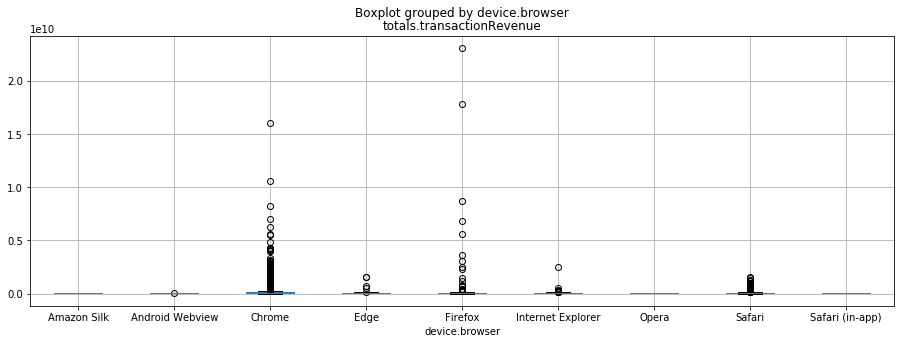

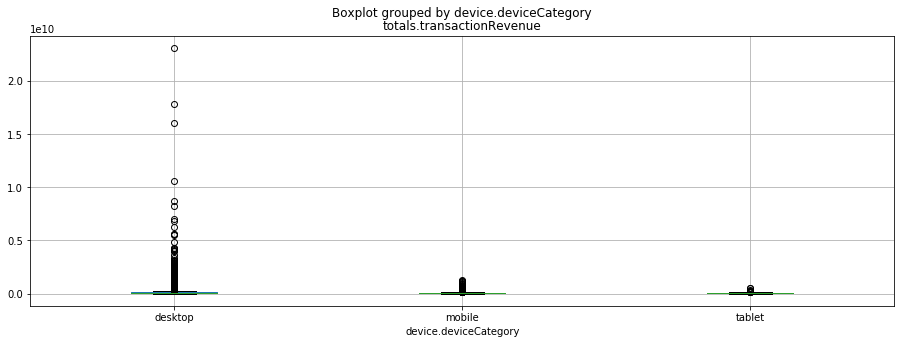

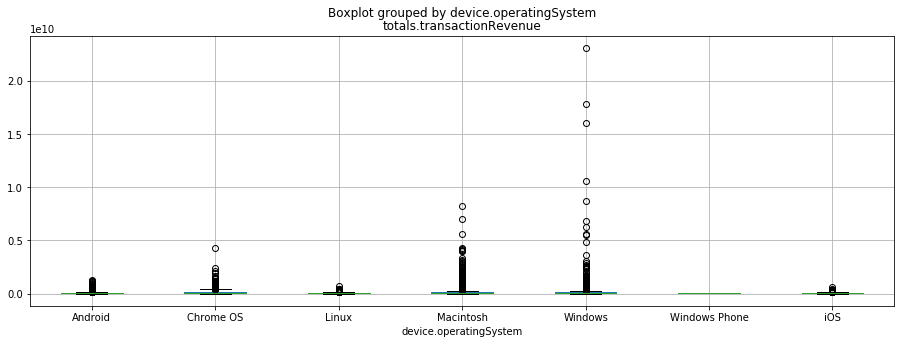

In [9]:
revenue_notnull = train[train['totals.transactionRevenue'].notnull()]
for col in device_columns:
    if col == 'device.isMobile':
        continue
    revenue_notnull.boxplot(column='totals.transactionRevenue', by=col, figsize=(15, 5))
    plt.show()

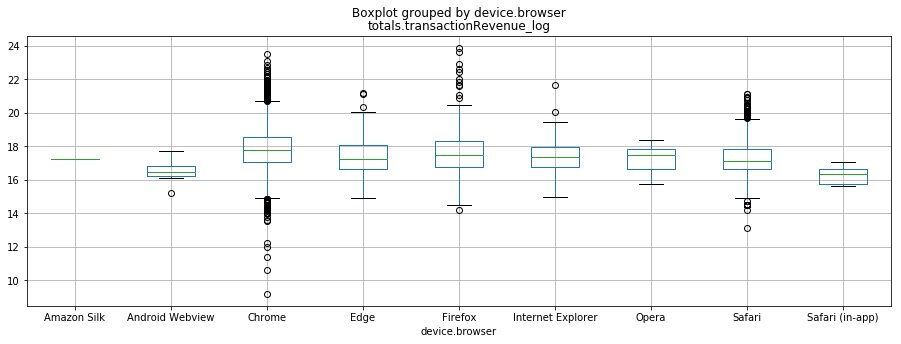

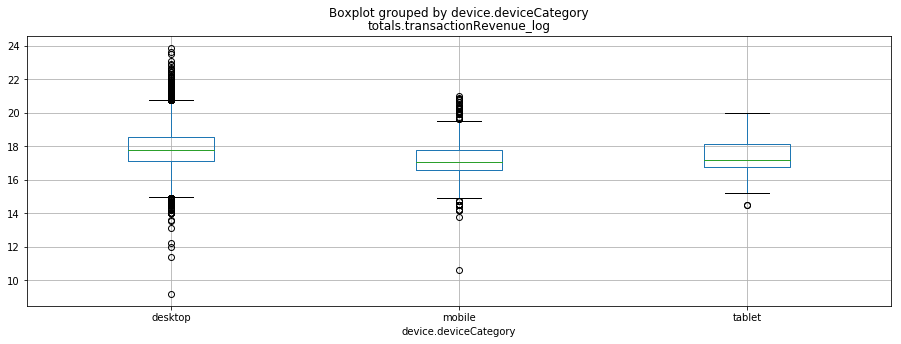

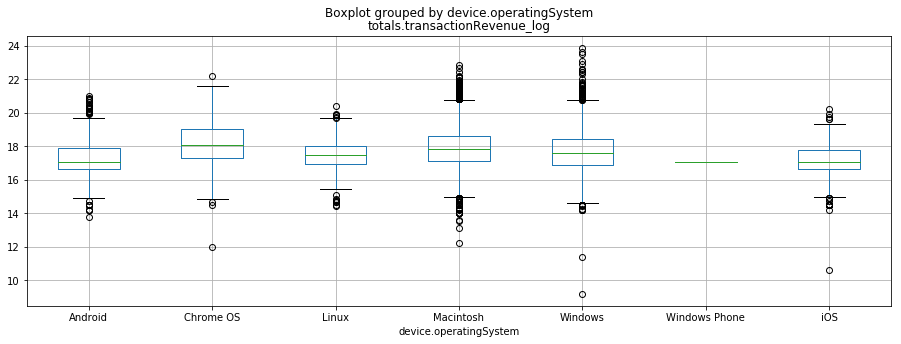

In [10]:
revenue_notnull = train[train['totals.transactionRevenue'].notnull()]
for col in device_columns:
    if col == 'device.isMobile':
        continue
    revenue_notnull.boxplot(column='totals.transactionRevenue_log', by=col, figsize=(15, 5))
    plt.show()

### カラム間の共起行列

In [11]:
col_sets = [['device.browser', 'device.deviceCategory'],
            ['device.browser', 'device.operatingSystem'],
            ['device.operatingSystem', 'device.deviceCategory']]

In [12]:
for sets in col_sets:
    display(revenue_notnull.groupby(sets).count()['date'].unstack().fillna(0).astype(int))

device.deviceCategory,desktop,mobile,tablet
device.browser,,,
Amazon Silk,0,0,1
Android Webview,0,5,1
Chrome,9801,487,65
Edge,58,0,0
Firefox,189,2,0
Internet Explorer,93,14,2
Opera,5,0,0
Safari,349,333,98
Safari (in-app),0,11,1


device.operatingSystem,Android,Chrome OS,Linux,Macintosh,Windows,Windows Phone,iOS
device.browser,,,,,,,
Amazon Silk,1,0,0,0,0,0,0
Android Webview,6,0,0,0,0,0,0
Chrome,458,994,779,6024,2004,0,94
Edge,0,0,0,0,58,0,0
Firefox,2,0,3,51,135,0,0
Internet Explorer,0,0,0,0,109,0,0
Opera,0,0,0,2,3,0,0
Safari,0,0,0,349,0,1,430
Safari (in-app),0,0,0,0,0,0,12


device.deviceCategory,desktop,mobile,tablet
device.operatingSystem,,,
Android,1,414,52
Chrome OS,994,0,0
Linux,781,1,0
Macintosh,6426,0,0
Windows,2293,14,2
Windows Phone,0,1,0
iOS,0,422,114


- WiiUがdesktopになっていたりmobileになっていたり。

In [13]:
for sets in col_sets:
    display(train.groupby(sets).count()['date'].unstack().fillna(0).astype(int))

device.deviceCategory,desktop,mobile,tablet
device.browser,,,
(not set),6,2,0
0,7,0,0
ADM,1,0,0
Amazon Silk,0,25,536
Android Browser,1,522,30
Android Runtime,0,2,0
Android Webview,4,7286,575
Apple-iPhone7C2,9,0,0
BlackBerry,0,184,0


device.operatingSystem,(not set),Android,BlackBerry,Chrome OS,Firefox OS,FreeBSD,Linux,Macintosh,NTT DoCoMo,Nintendo 3DS,Nintendo Wii,Nintendo WiiU,Nokia,OpenBSD,Samsung,SunOS,Windows,Windows Phone,Xbox,iOS
device.browser,,,,,,,,,,,,,,,,,,,,
(not set),6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ADM,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amazon Silk,0,561,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Android Browser,0,553,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Android Runtime,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Android Webview,0,7865,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Apple-iPhone7C2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BlackBerry,0,0,184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


device.deviceCategory,desktop,mobile,tablet
device.operatingSystem,,,
(not set),584,4077,34
Android,88,114752,9052
BlackBerry,0,218,0
Chrome OS,26337,0,0
Firefox OS,0,87,2
FreeBSD,9,0,0
Linux,34911,112,11
Macintosh,253895,39,4
NTT DoCoMo,0,1,0


### 特徴量作成

In [30]:
import itertools
device_columns = [col for col in device_columns if col not in 'device.isMobile']
[(col1, col2) for col1, col2 in itertools.product(device_columns, repeat=2) if col1 != col2]

[('device.browser', 'device.deviceCategory'),
 ('device.browser', 'device.operatingSystem'),
 ('device.deviceCategory', 'device.browser'),
 ('device.deviceCategory', 'device.operatingSystem'),
 ('device.operatingSystem', 'device.browser'),
 ('device.operatingSystem', 'device.deviceCategory')]

In [31]:
lda = LatentDirichletAllocation(n_components=5, learning_method='online', random_state=71)

In [32]:
total = pd.concat([train, test], axis=0, sort=True)
result = total.groupby(['device.browser', 'device.operatingSystem']).count()['date'].unstack().fillna(0).astype(int)

In [17]:
result

device.operatingSystem,(not set),Android,BlackBerry,Chrome OS,Firefox OS,FreeBSD,Linux,Macintosh,NTT DoCoMo,Nintendo 3DS,...,OpenBSD,Playstation Vita,Samsung,SunOS,SymbianOS,Tizen,Windows,Windows Phone,Xbox,iOS
device.browser,,,,,,,,,,,,,,,,,,,,,
(not set),10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
+Simple Browser,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
;__CT_JOB_ID__:0a075729-93a5-43d0-9638-4cbd41d5f5a5;,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
;__CT_JOB_ID__:0b39e7ca-1431-42e3-ba1f-9d8951a65840;,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
;__CT_JOB_ID__:2547db0b-ec43-452a-a0d4-ff42b7dc7907;,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
;__CT_JOB_ID__:2e0eca60-83ab-482d-bb81-343d113254fb;,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
;__CT_JOB_ID__:4333777f-bb0c-4a18-935e-df5658dbce2d;,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
;__CT_JOB_ID__:58e2ecba-7666-4a10-b498-8216457ce472;,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
result.shape

(129, 24)

In [19]:
lda.fit_transform(result).shape

(129, 5)

In [20]:
result_lda = pd.DataFrame(lda.fit_transform(result), index=result.index)
result_lda

,0,1,2,3,4
device.browser,,,,,
(not set),0.166812,0.015400,0.787002,0.015393,0.015393
+Simple Browser,0.022222,0.022226,0.911107,0.022222,0.022222
0,0.025000,0.025004,0.899995,0.025000,0.025000
;__CT_JOB_ID__:0a075729-93a5-43d0-9638-4cbd41d5f5a5;,0.100000,0.100022,0.599976,0.100001,0.100001
;__CT_JOB_ID__:0b39e7ca-1431-42e3-ba1f-9d8951a65840;,0.100000,0.100022,0.599976,0.100001,0.100001
;__CT_JOB_ID__:2547db0b-ec43-452a-a0d4-ff42b7dc7907;,0.100000,0.100022,0.599976,0.100001,0.100001
;__CT_JOB_ID__:2e0eca60-83ab-482d-bb81-343d113254fb;,0.100000,0.100022,0.599976,0.100001,0.100001
;__CT_JOB_ID__:4333777f-bb0c-4a18-935e-df5658dbce2d;,0.100000,0.100022,0.599976,0.100001,0.100001
;__CT_JOB_ID__:58e2ecba-7666-4a10-b498-8216457ce472;,0.100000,0.100022,0.599976,0.100001,0.100001


In [21]:
pd.merge(result_lda.reset_index(), total, on='device.browser')

,device.browser,0,1,2,3,4,channelGrouping,date,device.deviceCategory,device.isMobile,...,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,visitId,visitNumber,visitStartTime
0,(not set),0.166812,0.015400,0.787002,0.015393,0.015393,Social,2016-08-24,mobile,True,...,(not set),None,None,None,referral,/,m.facebook.com,1472107396,1,1472107396
1,(not set),0.166812,0.015400,0.787002,0.015393,0.015393,Direct,2017-07-01,desktop,False,...,(not set),None,True,None,(none),None,(direct),1498903570,1,1498903570
2,(not set),0.166812,0.015400,0.787002,0.015393,0.015393,Social,2016-08-15,desktop,False,...,(not set),None,None,None,referral,/yt/about/tr/,youtube.com,1471252594,1,1471252594
3,(not set),0.166812,0.015400,0.787002,0.015393,0.015393,Social,2016-08-08,desktop,False,...,(not set),None,None,None,referral,/yt/about/tr/,youtube.com,1470725446,1,1470725446
4,(not set),0.166812,0.015400,0.787002,0.015393,0.015393,Social,2016-08-28,desktop,False,...,(not set),None,None,None,referral,/yt/about/tr/,youtube.com,1472380408,1,1472380408
5,(not set),0.166812,0.015400,0.787002,0.015393,0.015393,Social,2017-06-29,desktop,False,...,(not set),None,None,None,referral,/yt/about/press/,youtube.com,1498739993,1,1498739993
6,(not set),0.166812,0.015400,0.787002,0.015393,0.015393,Direct,2017-05-20,mobile,True,...,(not set),None,True,None,(none),None,(direct),1495297312,1,1495297312
7,(not set),0.166812,0.015400,0.787002,0.015393,0.015393,Social,2016-09-18,desktop,False,...,(not set),None,None,None,referral,/yt/about/tr/,youtube.com,1474197888,1,1474197888
8,(not set),0.166812,0.015400,0.787002,0.015393,0.015393,Social,2017-10-06,desktop,False,...,(not set),NaN,None,None,referral,/intl/tr/yt/about/,youtube.com,1507328487,1,1507328487
9,(not set),0.166812,0.015400,0.787002,0.015393,0.015393,Social,2018-04-08,desktop,False,...,(not set),NaN,None,None,referral,/intl/tr/yt/about/policies/,youtube.com,1523186720,1,1523186720


In [22]:
total

,channelGrouping,date,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,fullVisitorId,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,...,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,visitId,visitNumber,visitStartTime
0,Organic Search,2016-09-02,Chrome,desktop,False,Windows,1131660440785968503,Izmir,not available in demo dataset,Asia,...,(not set),None,None,(not provided),organic,None,google,1472830385,1,1472830385
1,Organic Search,2016-09-02,Firefox,desktop,False,Macintosh,377306020877927890,not available in demo dataset,not available in demo dataset,Oceania,...,(not set),None,None,(not provided),organic,None,google,1472880147,1,1472880147
2,Organic Search,2016-09-02,Chrome,desktop,False,Windows,3895546263509774583,Madrid,not available in demo dataset,Europe,...,(not set),None,None,(not provided),organic,None,google,1472865386,1,1472865386
3,Organic Search,2016-09-02,UC Browser,desktop,False,Linux,4763447161404445595,not available in demo dataset,not available in demo dataset,Asia,...,(not set),None,None,google + online,organic,None,google,1472881213,1,1472881213
4,Organic Search,2016-09-02,Chrome,mobile,True,Android,27294437909732085,not available in demo dataset,not available in demo dataset,Europe,...,(not set),None,True,(not provided),organic,None,google,1472822600,2,1472822600
5,Organic Search,2016-09-02,Chrome,desktop,False,Windows,2938943183656635653,not available in demo dataset,not available in demo dataset,Europe,...,(not set),None,None,(not provided),organic,None,google,1472807194,1,1472807194
6,Organic Search,2016-09-02,Chrome,desktop,False,Windows,1905672039242460897,not available in demo dataset,not available in demo dataset,Asia,...,(not set),None,None,(not provided),organic,None,google,1472817241,1,1472817241
7,Organic Search,2016-09-02,Chrome,desktop,False,Windows,537222803633850821,Brisbane,not available in demo dataset,Oceania,...,(not set),None,None,(not provided),organic,None,google,1472812602,1,1472812602
8,Organic Search,2016-09-02,Internet Explorer,desktop,False,Windows,4445454811831400414,not available in demo dataset,not available in demo dataset,Europe,...,(not set),None,None,(not provided),organic,None,google,1472805784,1,1472805784
9,Organic Search,2016-09-02,Firefox,desktop,False,Windows,9499785259412240342,not available in demo dataset,not available in demo dataset,Europe,...,(not set),None,None,(not provided),organic,None,google,1472812272,1,1472812272


In [ ]:
train.groupby('fullVisitorId')